In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
calories = pd.read_csv("C:\\Users\\Vedant Shimpi\\OneDrive\\Desktop\\calories.csv")
exercise = pd.read_csv("C:\\Users\\Vedant Shimpi\\OneDrive\\Desktop\\exercise.csv")

In [18]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [20]:
calories.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


In [22]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [24]:
exercise.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [34]:
tot = exercise.merge(calories, on='User_ID')

In [36]:
tot

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [40]:
tot.shape

(15000, 9)

(array([2770., 2281., 1864., 1606., 1375., 1264., 1100., 1016.,  916.,
         808.]),
 array([20. , 25.9, 31.8, 37.7, 43.6, 49.5, 55.4, 61.3, 67.2, 73.1, 79. ]),
 <BarContainer object of 10 artists>)

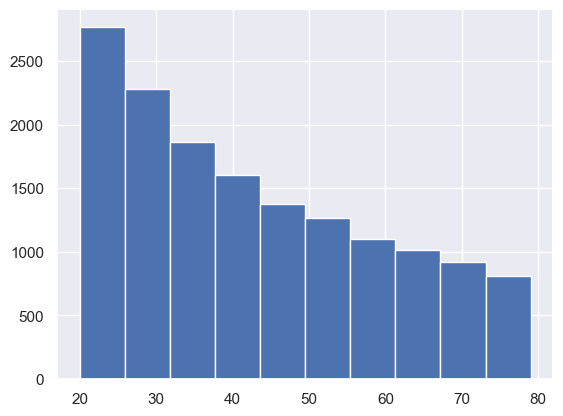

In [42]:
plt.hist(tot['Age'])

(array([  66.,  582., 1869., 2906., 3111., 3032., 2341.,  946.,  140.,
           7.]),
 array([ 67. ,  73.1,  79.2,  85.3,  91.4,  97.5, 103.6, 109.7, 115.8,
        121.9, 128. ]),
 <BarContainer object of 10 artists>)

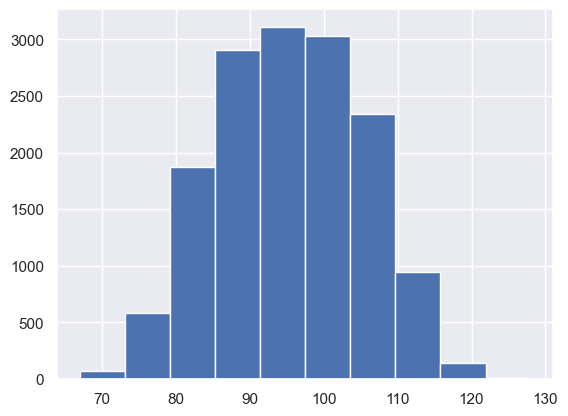

In [44]:
plt.hist(tot['Heart_Rate'])

In [46]:
tot['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [48]:
tot['Gender'] = tot['Gender'].map({'male': 1, 'female': 0})


In [50]:
tot.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [54]:
X = tot.drop(['User_ID', 'Calories'], axis=1)
y = tot['Calories']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [60]:
X_train.shape

(12750, 7)

In [62]:
X_test.shape

(2250, 7)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
y_pred = model.predict(X_test)

In [70]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 7.2132028
R2 Score: 0.9982004904956047


In [72]:
import pickle

In [74]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)